# Convex Optimisation Project

## Subject: Understanding and trying different optimizers in Neural Network to find the right one for our data analysis

## Data : Kaggle Competition House Prices - Advanced Regression Techniques

### Team : 

- SENECHAL Morgan
- Logerot Jules
- Costa Thomas

# Dataset Description

## File descriptions

- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
Data fields

## Data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


# Data Importation

In [2]:
#importing the data and overview 
df_train= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')


# Data Exploration

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
df_test.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,...,False,False,False,False,True,False,False,False,True,False
1,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,...,False,False,False,False,True,False,False,False,True,False
2,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,...,False,False,False,False,True,False,False,False,True,False
3,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,...,False,False,False,False,True,False,False,False,True,False
4,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,...,False,False,False,False,True,False,False,False,True,False


We decicded to drop the id column because this column will be not usefull in our analyse : 

In [4]:
# Dropping 'Id' column
df_train.drop('Id', axis=1, inplace=True)
df_test_ids = df_test['Id']
df_test.drop('Id', axis=1, inplace=True)


In [5]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 267 entries, LotArea to SaleCondition_Partial
dtypes: bool(216), float64(10), int64(41)
memory usage: 889.2 KB


Here we want to see the correlation between the SalePrice column and the other numerical columns : 

In [7]:
# Sélection des colonnes numériques uniquement
numeric_df = df_train.select_dtypes(include=[float, int])

# Calcul de la matrice de corrélation et tri des valeurs de corrélation avec 'SalePrice'
correlation_with_saleprice = numeric_df.corr()['SalePrice'].sort_values()

# Affichage des résultats
print(correlation_with_saleprice)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


Here we want to see the missing value in our columns :

Pourcentage of missing value in our columns : 

In [8]:
def missing_percent(df_train):
    nan_percent= 100*(df_train.isnull().sum()/len(df_train))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent

nan_percent= missing_percent(df_train)
nan_percent


Electrical       0.068493
MasVnrArea       0.547945
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
MasVnrType      59.726027
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [9]:
# Calcul du nombre total de colonnes avec des valeurs manquantes
num_columns_with_missing_values = len(nan_percent)

print(f"Nombre total de colonnes avec des valeurs manquantes : {num_columns_with_missing_values}")

Nombre total de colonnes avec des valeurs manquantes : 19


Number of missing value in our columns : 

In [10]:
missing=df_train.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

# Data Processing 

Filling the columns that have missing value with logical values:

- 'no' value: Used for categorical columns where a missing value means the absence of the characteristic.

- Value 0: Used for numeric columns where a missing value means the absence of the characteristic or a zero value.

In [11]:
# Handling missing values
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']:
    df_train[col] = df_train[col].fillna('no')
    df_test[col] = df_test[col].fillna('no')

for col in ['GarageYrBlt', 'GarageType', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF']:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

Here we calcule again the number of missing value only in columns that still have missing value.

In [12]:
missing=df_train.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

LotFrontage    259
Electrical       1
dtype: int64

Here we cant assigne a value for the LotFrontage and Electrical columns because the value of this columns represent : 

- LotFrontage represents the linear length in feet of the street that is connected to the property. In other words, it is the measurement of the width of the land that is in direct contact with the street.

- Electrical indicates the type of electrical system installed in the property. Electrical systems in homes can vary in safety, efficiency and capacity.

So our decision is to drop this 2 columns because :

- The LotFrontage column has a missing value rate of 17.74%, which is relatively high. This means that almost a fifth of observations are missing this information. Deleting this column can be justified by the difficulty of filling in these values precisely without introducing bias.

- The Electrical column has only one missing value (0.068%). However, its potential impact on selling price prediction may be limited. Variations in electrical systems may not have a significant influence on the overall price of a home compared to other variables like living space, overall quality, etc.

In [13]:
# Dropping columns with remaining missing values
df_train.drop(['LotFrontage', 'Electrical'], axis=1, inplace=True)
df_test.drop(['LotFrontage', 'Electrical'], axis=1, inplace=True)


Now we can verify that our missing values : 

In [14]:
missing=df_train.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

Now we need to convert the MSSUbClass columns type int to type string because they do not represent quantities but categories. For example, the values can indicate different building types, such as 20 for a 1946 and later 1-story single-family home, 30 for a pre-1945 1-story single-family home, and so on. Moreover when we process categorical data in a machine learning model, it is often necessary to encode it correctly. By converting these values to strings, we are indicating that these values are distinct categories. Later, we'll use techniques like one-hot encoding to transform these categories into a form that models can use effectively.

In [15]:
# Converting MSSubClass to string
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)

In [16]:
df_train.select_dtypes(include='object')


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
1,20,RL,Pave,no,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
2,60,RL,Pave,no,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
3,70,RL,Pave,no,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,no,no,no,WD,Abnorml
4,60,RL,Pave,no,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,no,no,no,WD,Normal
1456,20,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,no,MnPrv,no,WD,Normal
1457,70,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,no,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,no,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,no,no,no,WD,Normal


# One hot encoding 

Here, we perform a one-hot encoding of the categorical variables for the training (df_train) and test (df_test) datasets, removing the first category to avoid multicollinearity. Then our code aligns the columns of the two datasets. data to ensure they have the same columns, adding zeros for missing columns in the test dataset. 
Finally, it checks if the 'SalePrice' column is present in the test dataset and removes it if so.

In [17]:
# One-hot encoding for categorical variables
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [18]:
# Aligning train and test data to ensure they have the same columns
df_train, df_test = df_train.align(df_test, join='left', axis=1, fill_value=0)


In [19]:
# Ensure 'SalePrice' is not in df_test
if 'SalePrice' in df_test.columns:
    df_test.drop('SalePrice', axis=1, inplace=True)


# Feature Selection

We separate the training data (df_train) into feature variables (X) and target variable (y) by removing the 'SalePrice' column from X and assigning it to y. Next, we align the columns of the training and test datasets (df_train and df_test) to ensure they have the same columns, adding zeros for missing columns in the test dataset.

In [20]:
# Splitting data into features and target variable
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [21]:
# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

# Deep Learning Model 

Here we install the a specifi version of scikit-learn to be sure that we can import KerasRegressor without error :

In [22]:
!pip uninstall -y scikit-learn scikeras


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [23]:
!pip install scikit-learn==1.2.2 scikeras==0.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.8 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [24]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


Machine and Deep Learning library:

In [25]:
import random
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor 
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

2024-06-02 12:45:11.373175: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 12:45:11.373295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 12:45:11.614010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_204/849885283.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


We set a random seed value to 42 to ensure reproducibility. Next, we have a set_seed function that sets this seed for different modules: np.random for NumPy, tf.random for TensorFlow, and random for Python's random module. This ensures that the results of our random operations are consistent each time we run the code :

In [26]:
# Fixing the random seed for reproducibility
seed_value = 42

In [27]:
def set_seed(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    random.seed(seed_value)

We use a StandardScaler to normalize the data. We adjust and transform the training data (X_train) then transform the validation (X_val) and test (df_test) data using this same scaler. Next, we transform the target variable y (SalePrice) to a logarithmic scale for the training (y_train) and validation (y_val) data to stabilize the variance and make the data more consistent with a normal distribution : 

In [28]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(df_test)

# Transforming y (SalePrice) into logarithmic scale
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

We have a function to create a model using Keras. It starts by initializing a sequential model and adds an input layer with the shape of the normalized training data. Next, we add several dense layers with ReLU activation, L2 regularization, and the Glorot Uniform initializer, followed by batch normalization and dropout regularization. Finally, a dense output layer without activation is added for regression, and the model is compiled with a specified optimizer and loss function, measuring the mean square error:

In [29]:
# Function to create model
def create_model(optimizer, loss):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    model.add(Dense(256, activation='relu', kernel_regularizer='l2', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(128, activation='relu', kernel_regularizer='l2', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(64, activation='relu', kernel_regularizer='l2', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(32, activation='relu', kernel_regularizer='l2', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(1, activation='linear', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)))  # No activation for regression
    model.compile(optimizer=optimizer, loss=loss, metrics=['mse'])
    return model


We define a list of optimizers (Adam, SGD, RMSprop, Nadam) and a list of loss functions (mse, mae, huber) to test. We specify a list of values for the number of epochs (here 150) and additional epochs (100) for further training with different loss functions. We also include a list of learning rates (0.001, 0.01, 0.1) to test. Next, we create a dictionary (unique_params) containing specific parameters for each optimizer. Finally, we initialize a results dictionary to store the results of the different tests :

In [30]:
optimizers = [Adam, SGD, RMSprop, Nadam]
loss_functions = ['mse', 'mae', 'huber']  # List of loss functions to test
epochs_list = [150]  # Example epoch values
additional_epochs = [100]  # Additional training for 100 epochs with different loss functions
learning_rates = [0.001, 0.01, 0.1]  # List of learning rates to test
unique_params = {
    "Adam": {"learning_rate": 0.01, "beta_1": 0.9, "beta_2": 0.999, "epsilon": 1e-07, "amsgrad": False},
    "SGD": {"learning_rate": 0.01, "momentum": 0.9, "nesterov": True},
    "RMSprop": {"learning_rate": 0.01, "rho": 0.9, "momentum": 0.9, "epsilon": 1e-07, "centered": True},
    "Nadam": {"learning_rate": 0.01, "beta_1": 0.9, "beta_2": 0.999, "epsilon": 1e-07},
}
results = {}

We have a display_optimizer_parameters function that displays the optimizer parameters. For each optimizer in the optimizers list, we create an instance of the optimizer with default settings. We get the optimizer name (opt_name) and its configuration (config). Next, we print the configuration parameters for each optimizer, displaying them as key-value pairs. Each parameter block is followed by a line break for better readability : 

In [31]:
# Function to display optimizer parameters
def display_optimizer_parameters(optimizers):
    for opt in optimizers:
        optimizer_instance = opt()  # Instantiate optimizer with default parameters
        opt_name = opt.__name__  # Get the name of the optimizer
        config = optimizer_instance.get_config()  # Get optimizer configuration
        print(f"Parameters for {opt_name}:")
        for key, value in config.items():
            print(f"  {key}: {value}")
        print("\n")


In [32]:
# Display parameters for each optimizer
display_optimizer_parameters(optimizers)

Parameters for Adam:
  name: adam
  learning_rate: 0.0010000000474974513
  weight_decay: None
  clipnorm: None
  global_clipnorm: None
  clipvalue: None
  use_ema: False
  ema_momentum: 0.99
  ema_overwrite_frequency: None
  loss_scale_factor: None
  gradient_accumulation_steps: None
  beta_1: 0.9
  beta_2: 0.999
  epsilon: 1e-07
  amsgrad: False


Parameters for SGD:
  name: SGD
  learning_rate: 0.009999999776482582
  weight_decay: None
  clipnorm: None
  global_clipnorm: None
  clipvalue: None
  use_ema: False
  ema_momentum: 0.99
  ema_overwrite_frequency: None
  loss_scale_factor: None
  gradient_accumulation_steps: None
  momentum: 0.0
  nesterov: False


Parameters for RMSprop:
  name: rmsprop
  learning_rate: 0.0010000000474974513
  weight_decay: None
  clipnorm: None
  global_clipnorm: None
  clipvalue: None
  use_ema: False
  ema_momentum: 0.99
  ema_overwrite_frequency: 100
  loss_scale_factor: None
  gradient_accumulation_steps: None
  rho: 0.9
  momentum: 0.0
  epsilon: 1e-

### Adam
**Unique parameters:**
- **beta_1:** Coefficient for growth and development (default 0.9).
- **beta_2:** Coefficient for growth and development (default 0.999).
- **epsilon:** Small number to avoid division by zero (default 1e-07).
- **amsgrad:** Boolean indicating if the AMSGrad algorithm should be used (default False).

### SGD
**Unique parameters:**
- **momentum:** Rate of momentum for acceleration of gradient descent (default 0.0).
- **nesterov:** Boolean indicating if Nesterov momentum should be used (default False).

### RMSprop
**Unique parameters:**
- **rho:** Decay factor for the moving average of squared gradients (default 0.9).
- **momentum:** Rate of momentum for acceleration of gradient descent (default 0.0).
- **epsilon:** Small number to avoid division by zero (default 1e-07).
- **centered:** Boolean indicating if the variance should be centered (default False).

### Nadam
**Unique parameters:**
- **beta_1:** Coefficient for growth and development (default 0.9).
- **beta_2:** Coefficient for growth and development (default 0.999).
- **epsilon:** Small number to avoid division by zero (default 1e-07).

### Common Parameters
All these optimizers share the following parameters (although their default values may differ):
- **learning_rate:** Learning rate.
- **weight_decay:** Weight decay (default None).
- **clipnorm:** Norm for gradient clipping (default None).
- **global_clipnorm:** Global norm for gradient clipping (default None).
- **clipvalue:** Value for gradient clipping (default None).
- **use_ema:** Boolean indicating if Exponential Moving Average (EMA) should be used (default False).
- **ema_momentum:** Momentum for EMA (default 0.99).
- **ema_overwrite_frequency:** Overwrite frequency for EMA (default None).
- **loss_scale_factor:** Loss scaling factor (default None).
- **gradient_accumulation_steps:** Number of gradient accumulation steps (default None).

### Summary of Unique Parameters

| Optimizer |  Unique Parameters |
|------------|--------------------|
| Adam       | beta_1, beta_2, epsilon, amsgrad |
| SGD        | momentum, nesterov |
| RMSprop    | rho, momentum, epsilon, centered |
| Nadam      | beta_1, beta_2, epsilon |

These unique parameters are what distinguish each optimizer from the others, affecting how they update the model weights during training.

## Test epoch : 0 to 150

We iterate over each optimizer in the optimizers list. For each optimizer, we obtain its class name (opt_name) and initialize an entry in the results dictionary. For each value in epochs_list, we display a message indicating the optimizer and the number of epochs being trained.

We reset the random seed to ensure reproducibility (set_seed(seed_value)). Next, we create an instance of the optimizer and a model using the create_model function with the optimizer and the default 'mse' loss function.

We define callbacks for early stopping (EarlyStopping) and saving the best model (ModelCheckpoint). We train the model on the normalized and log-transformed training data (X_train_scaled and y_train_log), using 20% cross-validation of the data, for the specified number of epochs.

Next, we load the weights of the best model saved by ModelCheckpoint. We make predictions on the normalized validation data (X_val_scaled), calculate the mean square error (MSE) between the predicted and actual log-transformed values, and store the results (MSE and training history) in the results dictionary.

Finally, we display the MSE for the optimizer and the number of epochs being trained.

In [33]:
for opt in optimizers:
    opt_name = opt.__name__  # Access the class name directly
    results[opt_name] = {}
    for epochs in epochs_list:
        print(f"Training with optimizer: {opt_name}, epochs: {epochs}")
        
        set_seed(seed_value)  # Reinitialize the seed before creating the model
        optimizer_instance = opt()  # Create a new instance of the optimizer
        model = create_model(optimizer=optimizer_instance, loss='mse')  # Default loss function 'mse'
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(f'best_model_{opt_name}_epochs_{epochs}.keras', monitor='val_loss', save_best_only=True, verbose=1)
        
        history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=epochs, batch_size=32, 
                            callbacks=[early_stopping, model_checkpoint], verbose=1)
        
        # Load the best model saved by ModelCheckpoint
        model.load_weights(f'best_model_{opt_name}_epochs_{epochs}.keras')
        
        y_pred_log = model.predict(X_val_scaled)
        
        mse = mean_squared_error(y_val_log, y_pred_log.flatten())
        
        results[opt_name][f'epochs_{epochs}_mse'] = {'MSE': mse, 'history': history.history}
        
        print(f"Optimizer: {opt_name}, Epochs: {epochs}, Test MSE: {mse}")


Training with optimizer: Adam, epochs: 150
Epoch 1/150
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.8560 - mse: 146.2713  

I0000 00:00:1717332374.741595     269 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: 151.7273 - mse: 146.1441
Epoch 1: val_loss improved from inf to 144.39944, saving model to best_model_Adam_epochs_150.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - loss: 151.7009 - mse: 146.1179 - val_loss: 144.3994 - val_mse: 138.8348
Epoch 2/150
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147.1675 - mse: 141.6054 
Epoch 2: val_loss improved from 144.39944 to 139.98276, saving model to best_model_Adam_epochs_150.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 146.9201 - mse: 141.3585 - val_loss: 139.9828 - val_mse: 134.4307
Epoch 3/150
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.3926 - mse: 134.8424 
Epoch 3: val_loss improved from 139.98276 to 135.39253, saving model to best_model_Adam_epochs_150.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 140.3515 - mse: 134.8015 - val_loss: 135.3925 - val_mse: 129.8475
Epoch 4/150
19/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 135.8861 - mse: 130.3417 
Epoch 4: val_loss im

### test loss function 

We perform additional training with different loss functions for each optimizer in the optimizers list. For each combination of optimizer and loss function in loss_functions, and for each value of epochs in additional_epochs, we display a message indicating the optimizer, loss function, and number of epochs being trained.

We reset the random seed to ensure reproducibility (set_seed(seed_value)). Next, we create an instance of the optimizer and a model using the create_model function with the optimizer and the specified loss function.

We define callbacks for early stopping (EarlyStopping) and saving the best model (ModelCheckpoint). We train the model on the normalized and log-transformed training data (X_train_scaled and y_train_log), using 20% cross-validation of the data, for the specified number of epochs.

Next, we load the weights of the best model saved by ModelCheckpoint. We make predictions on the normalized validation data (X_val_scaled), calculate the mean square error (MSE) between the predicted and actual log-transformed values, and store the results (MSE and training history) in the results dictionary.

Finally, we display the MSE for the optimizer, the loss function, and the number of epochs being trained.

In [34]:
# Additional training with different loss functions
for opt in optimizers:
    opt_name = opt.__name__  # Access the class name directly
    for loss in loss_functions:
        for epochs in additional_epochs:
            print(f"Training with optimizer: {opt_name}, loss function: {loss}, epochs: {epochs}")
            
            set_seed(seed_value)  # Reinitialize the seed before creating the model
            optimizer_instance = opt()  # Create a new instance of the optimizer
            model = create_model(optimizer=optimizer_instance, loss=loss)
            
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            model_checkpoint = ModelCheckpoint(f'best_model_{opt_name}_loss_{loss}_epochs_{epochs}.keras', monitor='val_loss', save_best_only=True, verbose=1)
            
            history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=epochs, batch_size=32, 
                                callbacks=[early_stopping, model_checkpoint], verbose=1)
            
            # Load the best model saved by ModelCheckpoint
            model.load_weights(f'best_model_{opt_name}_loss_{loss}_epochs_{epochs}.keras')
            
            y_pred_log = model.predict(X_val_scaled)
            
            mse = mean_squared_error(y_val_log, y_pred_log.flatten())
            
            results[opt_name][f'epochs_{epochs}_loss_{loss}'] = {'MSE': mse, 'history': history.history}
            
            print(f"Optimizer: {opt_name}, Loss Function: {loss}, Epochs: {epochs}, Test MSE: {mse}")


Training with optimizer: Adam, loss function: mse, epochs: 100
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 151.7273 - mse: 146.1441
Epoch 1: val_loss improved from inf to 144.39944, saving model to best_model_Adam_loss_mse_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 308ms/step - loss: 151.7009 - mse: 146.1179 - val_loss: 144.3994 - val_mse: 138.8348
Epoch 2/100
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147.3045 - mse: 141.7422 
Epoch 2: val_loss improved from 144.39944 to 139.98276, saving model to best_model_Adam_loss_mse_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 146.9201 - mse: 141.3585 - val_loss: 139.9828 - val_mse: 134.4307
Epoch 3/100
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140.3944 - mse: 134.8440 
Epoch 3: val_loss improved from 139.98276 to 135.39253, saving model to best_model_Adam_loss_mse_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 140.3515 - mse: 134.8015 - val_loss: 135.3925 - val_mse: 129.8475
Epo

### test leanring rate

We perform additional training with different learning rates for each optimizer in the optimizers list. For each combination of optimizer and learning rate in learning_rates, we display a message indicating the optimizer, learning rate, and the number of epochs being trained (100 epochs).

We reset the random seed to ensure reproducibility (set_seed(seed_value)). Next, we create an instance of the optimizer specifying the learning rate (learning_rate=lr) and a model using the create_model function with the optimizer and the default loss function 'mse'.

We define callbacks for early stopping (EarlyStopping) and saving the best model (ModelCheckpoint). We train the model on normalized and log-transformed training data (X_train_scaled and y_train_log), using 20% cross-validation of the data, for 100 epochs.

Next, we check if the training produced NaN values in losses (loss) or validation losses (val_loss). If NaN values are detected, we display a message and move on to the next combination.

If no NaN value is detected, we load the weights of the best model saved by ModelCheckpoint. We make predictions on the normalized validation data (X_val_scaled), calculate the mean square error (MSE) between the predicted and actual log-transformed values, and store the results (MSE and training history) in the results dictionary.

Finally, we display the MSE for the optimizer, the learning rate, and the 100 epochs currently being trained.

The loss (loss) and mean square error (mse) values became NaN during training with a high learning rate (0.1). This often happens because the learning rate is too high, causing the model weights to oscillate unsteadily.
To resolve this issue, we can add a check to ignore hyperparameter combinations that result in NaN values during training.

In [35]:
# Additional training with different learning rates for 100 epochs
for opt in optimizers:
    opt_name = opt.__name__  # Access the class name directly
    for lr in learning_rates:
        print(f"Training with optimizer: {opt_name}, learning rate: {lr}, epochs: 100")
        
        set_seed(seed_value)  # Reinitialize the seed before creating the model
        optimizer_instance = opt(learning_rate=lr)  # Set learning rate for the optimizer
        model = create_model(optimizer=optimizer_instance, loss='mse')
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint(f'best_model_{opt_name}_lr_{lr}_epochs_100.keras', monitor='val_loss', save_best_only=True, verbose=1)
        
        history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=100, batch_size=32, 
                            callbacks=[early_stopping, model_checkpoint], verbose=1)
        
        # Check if the training produced NaN values
        if np.isnan(history.history['loss']).any() or np.isnan(history.history['val_loss']).any():
            print(f"Training with optimizer: {opt_name}, learning rate: {lr}, epochs: 100 resulted in NaN values. Skipping...")
            continue
        
        # Load the best model saved by ModelCheckpoint
        model.load_weights(f'best_model_{opt_name}_lr_{lr}_epochs_100.keras')
        
        y_pred_log = model.predict(X_val_scaled)
        
        mse = mean_squared_error(y_val_log, y_pred_log.flatten())
        
        results[opt_name][f'lr_{lr}_epochs_100'] = {'MSE': mse, 'history': history.history}
        
        print(f"Optimizer: {opt_name}, Learning Rate: {lr}, Epochs: 100, Test MSE: {mse}")

Training with optimizer: Adam, learning rate: 0.001, epochs: 100
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 151.7273 - mse: 146.1441
Epoch 1: val_loss improved from inf to 144.39944, saving model to best_model_Adam_lr_0.001_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step - loss: 151.7009 - mse: 146.1179 - val_loss: 144.3994 - val_mse: 138.8348
Epoch 2/100
19/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147.4527 - mse: 141.8902 
Epoch 2: val_loss improved from 144.39944 to 139.98276, saving model to best_model_Adam_lr_0.001_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 146.9201 - mse: 141.3585 - val_loss: 139.9828 - val_mse: 134.4307
Epoch 3/100
19/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 140.4168 - mse: 134.8662 
Epoch 3: val_loss improved from 139.98276 to 135.39253, saving model to best_model_Adam_lr_0.001_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 140.3515 - mse: 134.8015 - val_loss: 135.3925 - val_mse: 129.8475
E

### Test Optimizers Parameters

We train models with different optimizers using unique parameters for each optimizer, for 100 epochs. For each optimizer in the optimizers list, we obtain its name (opt_name) and the associated unique parameters (params) from the unique_params dictionary. We display a message showing the unique optimizer and settings for 100 epochs.

We reset the random seed to ensure reproducibility (set_seed(seed_value)). Next, we create an instance of the optimizer using the unique settings and display the optimizer settings.

We create the model using the create_model function with the default optimizer and loss function 'mse'. We define callbacks for early stopping (EarlyStopping) and saving the best model (ModelCheckpoint). We train the model on normalized and log-transformed training data (X_train_scaled and y_train_log), using 20% cross-validation of the data, for 100 epochs.

Next, we load the weights of the best model saved by ModelCheckpoint. We make predictions on the normalized validation data (X_val_scaled), calculate the mean square error (MSE) between the predicted and actual log-transformed values, and store the results (MSE and training history) in the results dictionary.

Finally, we display the MSE for the optimizer with the single parameters and the 100 training epochs.

In [36]:
for opt in optimizers:
    opt_name = opt.__name__
    params = unique_params[opt_name]
    print(f"Training with optimizer: {opt_name} with unique parameters for 100 epochs")

    set_seed(seed_value)
    optimizer_instance = opt(**params)

    # Print optimizer parameters
    print(f"Optimizer parameters for {opt_name} with unique parameters: {optimizer_instance.get_config()}")

    model = create_model(optimizer=optimizer_instance, loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'best_model_{opt_name}_unique_params_epochs_100.keras', monitor='val_loss', save_best_only=True, verbose=1)

    history = model.fit(X_train_scaled, y_train_log, validation_split=0.2, epochs=100, batch_size=32,
                        callbacks=[early_stopping, model_checkpoint], verbose=1)

    # Load the best model saved by ModelCheckpoint
    model.load_weights(f'best_model_{opt_name}_unique_params_epochs_100.keras')

    y_pred_log = model.predict(X_val_scaled)

    mse = mean_squared_error(y_val_log, y_pred_log.flatten())

    if opt_name not in results:
        results[opt_name] = {}

    results[opt_name][f'unique_params_epochs_100'] = {'MSE': mse, 'history': history.history}

    print(f"Optimizer: {opt_name}, Unique Parameters, Epochs: 100, Test MSE: {mse}")


Training with optimizer: Adam with unique parameters for 100 epochs
Optimizer parameters for Adam with unique parameters: {'name': 'adam', 'learning_rate': 0.009999999776482582, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 142.8653 - mse: 136.4975
Epoch 1: val_loss improved from inf to 81.46194, saving model to best_model_Adam_unique_params_epochs_100.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 315ms/step - loss: 142.4407 - mse: 136.0451 - val_loss: 81.4619 - val_mse: 72.9032
Epoch 2/100
19/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.9420 - mse: 75.1227  
Epoch 2: val_loss improved from 81.46194 to 43.84258, saving model to best_model_Adam_unique_params_epochs_100.keras
26/26 ━━━━━━━━━━━━━━

### Find best parameters for Optimizers:

In [37]:
rm -rf hyperparam_tuning


We define a class MyHyperModel which inherits from HyperModel. The build method constructs a sequential neural network model with 4 fixed dense layers (256, 128, 64, 32 units) followed by batch normalization and dropout. The output layer is dense with linear activation. The choice of the optimizer (adam, sgd, rmsprop, nadam) and its hyperparameters are determined dynamically via hp.Choice and hp.Float objects. The model is compiled with an mse loss function and an mse metric.

Generally speaking, this model is the same as the previous one. It is simply adapted to be used with keras Tuner for hyperparameter search.

In [38]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Input(shape=(X_train_scaled.shape[1],)))
        
        # Fixed number of dense layers with specific units
        units = [256, 128, 64, 32]
        dropout_rate = 0.3  # Fixed dropout rate
        
        for i in range(4):  # Exactly 4 layers
            model.add(Dense(
                units=units[i],
                activation='relu',
                kernel_regularizer=l2(),
                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)
            ))
            model.add(BatchNormalization())
            model.add(Dropout(rate=dropout_rate))
        
        model.add(Dense(1, activation='linear', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed_value)))
        
        # Choosing the optimizer and its parameters
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'nadam'])
        if optimizer_choice == 'adam':
            opt = Adam(
                learning_rate=hp.Float('lr_adam', min_value=1e-4, max_value=1e-2, sampling='LOG'),
                beta_1=hp.Float('beta_1_adam', min_value=0.8, max_value=0.99, step=0.01),
                beta_2=hp.Float('beta_2_adam', min_value=0.9, max_value=0.999, step=0.001),
                epsilon=hp.Float('epsilon_adam', min_value=1e-8, max_value=1e-6, sampling='LOG'),
                amsgrad=hp.Boolean('amsgrad_adam')
            )
        elif optimizer_choice == 'sgd':
            opt = SGD(
                learning_rate=hp.Float('lr_sgd', min_value=1e-4, max_value=1e-2, sampling='LOG'),
                momentum=hp.Float('momentum_sgd', min_value=0.0, max_value=0.99, step=0.01),
                nesterov=hp.Boolean('nesterov_sgd')
            )
        elif optimizer_choice == 'rmsprop':
            opt = RMSprop(
                learning_rate=hp.Float('lr_rmsprop', min_value=1e-4, max_value=1e-2, sampling='LOG'),
                rho=hp.Float('rho_rmsprop', min_value=0.8, max_value=0.99, step=0.01),
                momentum=hp.Float('momentum_rmsprop', min_value=0.0, max_value=0.99, step=0.01),
                epsilon=hp.Float('epsilon_rmsprop', min_value=1e-8, max_value=1e-6, sampling='LOG'),
                centered=hp.Boolean('centered_rmsprop')
            )
        elif optimizer_choice == 'nadam':
            opt = Nadam(
                learning_rate=hp.Float('lr_nadam', min_value=1e-4, max_value=1e-2, sampling='LOG'),
                beta_1=hp.Float('beta_1_nadam', min_value=0.8, max_value=0.99, step=0.01),
                beta_2=hp.Float('beta_2_nadam', min_value=0.9, max_value=0.999, step=0.001),
                epsilon=hp.Float('epsilon_nadam', min_value=1e-8, max_value=1e-6, sampling='LOG')
            )

        model.compile(optimizer=opt, loss='mse', metrics=['mse'])
        return model


We define a tuner using the RandomSearch class to perform a random hyperparameter search on our model. The tuner uses the hyperparametric model defined in `MyHyperModel()` and optimizes the val_mse objective (mean squared error on validation data). It will run up to 100 trials (`max_trials`) and each trial will run once (`executions_per_trial`). The search results will be saved in the hyperparam_tuning directory under the project named house_prices.

In [39]:
# Define a tuner
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_mse',
    max_trials=100,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='house_prices'
)

Here, we set a seed (`set_seed(seed_value)`) to ensure the reproducibility of the results. Then, we launch the hyperparameter search with the tuner defined previously using the training data `X_train_scaled` and `y_train_log`, and the validation data `X_val_scaled` and `y_val_log`. The search is performed over 150 epochs (`epochs`) with a batch size of 32 (`batch_size`). An `EarlyStopping` callback is used to stop training if the validation loss (`val_loss`) does not improve for 10 consecutive epochs.

In [40]:
# Set seed for reproducibility
set_seed(seed_value)

# Perform hyperparameter search
tuner.search(
    X_train_scaled, y_train_log,
    validation_data=(X_val_scaled, y_val_log),
    epochs=150,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)]
)

Trial 100 Complete [00h 00m 44s]
val_mse: 0.0448736809194088

Best val_mse So Far: 0.029791157692670822
Total elapsed time: 01h 16m 21s


In [41]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


We extract the best hyperparameters after the search and identify the optimal optimizer among several options (`adam`, `sgd`, `rmsprop`, `nadam`). We retrieve the corresponding hyperparameters and print them. If the optimizer is `adam`, it configures the Adam optimizer with specific values ​​of `learning_rate`, `beta_1`, `beta_2`, `epsilon`, and `amsgrad`. Likewise, it configures `sgd`, `rmsprop`, or `nadam` with their specific hyperparameters if the selected optimizer is one of those. The code also prints the corresponding hyperparameter values ​​for the selected optimizer.

In [42]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Retrieve the best optimizer
best_optimizer = best_hps.get('optimizer')

print("The hyperparameter search is complete. The optimal hyperparameters are:")
print(f"Optimizer: {best_optimizer}")

if best_optimizer == 'adam':
    opt = Adam(
        learning_rate=best_hps.get('lr_adam'),
        beta_1=best_hps.get('beta_1_adam'),
        beta_2=best_hps.get('beta_2_adam'),
        epsilon=best_hps.get('epsilon_adam'),
        amsgrad=best_hps.get('amsgrad_adam')
    )
    print(f"Learning Rate: {best_hps.get('lr_adam')}")
    print(f"Beta 1: {best_hps.get('beta_1_adam')}")
    print(f"Beta 2: {best_hps.get('beta_2_adam')}")
    print(f"Epsilon: {best_hps.get('epsilon_adam')}")
    print(f"Amsgrad: {best_hps.get('amsgrad_adam')}")
elif best_optimizer == 'sgd':
    opt = SGD(
        learning_rate=best_hps.get('lr_sgd'),
        momentum=best_hps.get('momentum_sgd'),
        nesterov=best_hps.get('nesterov_sgd')
    )
    print(f"Learning Rate: {best_hps.get('lr_sgd')}")
    print(f"Momentum: {best_hps.get('momentum_sgd')}")
    print(f"Nesterov: {best_hps.get('nesterov_sgd')}")
elif best_optimizer == 'rmsprop':
    opt = RMSprop(
        learning_rate=best_hps.get('lr_rmsprop'),
        rho=best_hps.get('rho_rmsprop'),
        momentum=best_hps.get('momentum_rmsprop'),
        epsilon=best_hps.get('epsilon_rmsprop'),
        centered=best_hps.get('centered_rmsprop')
    )
    print(f"Learning Rate: {best_hps.get('lr_rmsprop')}")
    print(f"Rho: {best_hps.get('rho_rmsprop')}")
    print(f"Momentum: {best_hps.get('momentum_rmsprop')}")
    print(f"Epsilon: {best_hps.get('epsilon_rmsprop')}")
    print(f"Centered: {best_hps.get('centered_rmsprop')}")
elif best_optimizer == 'nadam':
    opt = Nadam(
        learning_rate=best_hps.get('lr_nadam'),
        beta_1=best_hps.get('beta_1_nadam'),
        beta_2=best_hps.get('beta_2_nadam'),
        epsilon=best_hps.get('epsilon_nadam')
    )
    print(f"Learning Rate: {best_hps.get('lr_nadam')}")
    print(f"Beta 1: {best_hps.get('beta_1_nadam')}")
    print(f"Beta 2: {best_hps.get('beta_2_nadam')}")
    print(f"Epsilon: {best_hps.get('epsilon_nadam')}")


The hyperparameter search is complete. The optimal hyperparameters are:
Optimizer: nadam
Learning Rate: 0.008850221174397929
Beta 1: 0.8300000000000001
Beta 2: 0.9390000000000001
Epsilon: 1.1037353035334539e-07


Now that we have found our best optimizer with these best hyperparameters, we reconstruct the model with the best hyperparameters found and compile it with the optimal optimizer (`opt`), the loss `mse` (mean squared error), and the metric `mse`. We define two callbacks: `EarlyStopping` to stop training if the validation loss does not improve for 10 epochs, and `ModelCheckpoint` to save the best model based on the validation loss. Then, we train the model using the training (`X_train_scaled`, `y_train_log`) and validation (`X_val_scaled`, `y_val_log`) data, over 150 epochs with a batch size of 32, while using the defined callbacks.

In [43]:
# Rebuild the model using the best hyperparameters and compile it
model = tuner.hypermodel.build(best_hps)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f'best_model_keras_tuner_epochs_100.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train_scaled, y_train_log,
    validation_data=(X_val_scaled, y_val_log),
    epochs=150,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 140.9977 - mse: 135.0581
Epoch 1: val_loss improved from inf to 100.77865, saving model to best_model_keras_tuner_epochs_100.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - loss: 140.5313 - mse: 134.5816 - val_loss: 100.7786 - val_mse: 93.8129
Epoch 2/150
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.1293 - mse: 55.9305
Epoch 2: val_loss improved from 100.77865 to 19.86769, saving model to best_model_keras_tuner_epochs_100.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60.7767 - mse: 53.5517 - val_loss: 19.8677 - val_mse: 12.1028
Epoch 3/150
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6122 - mse: 6.8127 
Epoch 3: val_loss improved from 19.86769 to 16.64290, saving model to best_model_keras_tuner_epochs_100.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.4758 - mse: 6.6676 - val_loss: 16.6429 - val_mse: 8.8934
Epoch 4/150
19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.7839 - mse: 5.0947 
Epoch 4: v

Now, we evaluate the optimal model on the validation data. To do this, we predict the values ​​of `y` for `X_val_scaled` using `model.predict()`, then calculate the mean square error (MSE) between the predictions (`y_pred_log_test2.flatten()`) and the true ones. values ​​(`y_val_log`) using `mean_squared_error()`. The results are then saved in a `results` dictionary under the `'Keras_Tuner`` key, including the MSE of the optimal model and the training history (`history.history`).

In [44]:
# Évaluer le modèle optimal sur les données de validation
y_pred_log_test2 = model.predict(X_val_scaled)
mse_test2 = mean_squared_error(y_val_log, y_pred_log_test2.flatten())

results['Keras_Tuner'] = {
    'optimal_model_keras_tuner_mse': {'MSE': mse_test2, 'history': history.history}
}

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


# Resultat

Show the result of our test:

In [45]:
# Créer une liste pour stocker les résultats
results_of_the_test = []

# Parcourir les résultats et ajouter chaque entrée à la liste
for opt in results:
    for config in results[opt]:
        mse_value = results[opt][config]['MSE']
        results_of_the_test.append([opt, config, mse_value])

# Convertir la liste en DataFrame pandas
result_table = pd.DataFrame(results_of_the_test, columns=["Optimizer", "Configuration", "MSE"])

# Afficher le DataFrame
print(result_table)

      Optimizer                  Configuration       MSE
0          Adam                 epochs_150_mse  0.081190
1          Adam            epochs_100_loss_mse  0.104574
2          Adam            epochs_100_loss_mae  0.258640
3          Adam          epochs_100_loss_huber  0.068115
4          Adam            lr_0.001_epochs_100  0.104574
5          Adam             lr_0.01_epochs_100  0.056995
6          Adam              lr_0.1_epochs_100  0.078273
7          Adam       unique_params_epochs_100  0.056995
8           SGD                 epochs_150_mse  0.041406
9           SGD            epochs_100_loss_mse  0.064181
10          SGD            epochs_100_loss_mae  0.089661
11          SGD          epochs_100_loss_huber  0.091117
12          SGD            lr_0.001_epochs_100  0.105312
13          SGD             lr_0.01_epochs_100  0.064181
14          SGD       unique_params_epochs_100  0.068041
15      RMSprop                 epochs_150_mse  0.057422
16      RMSprop            epoc

In [46]:
# Initialiser les variables pour stocker le meilleur résultat
best_optimizer = None
best_config = None
best_mse = float('inf')

# Parcourir les résultats pour trouver le meilleur optimiseur et configuration
for opt in results:
    for config in results[opt]:
        mse_value = results[opt][config]['MSE']
        if mse_value < best_mse:
            best_mse = mse_value
            best_optimizer = opt
            best_config = config

# Afficher le meilleur résultat
print("Best result:")
print(f"Optimizer: {best_optimizer}, Configuration: {best_config}, MSE: {best_mse}")


Best result:
Optimizer: Keras_Tuner, Configuration: optimal_model_keras_tuner_mse, MSE: 0.029000900045229698


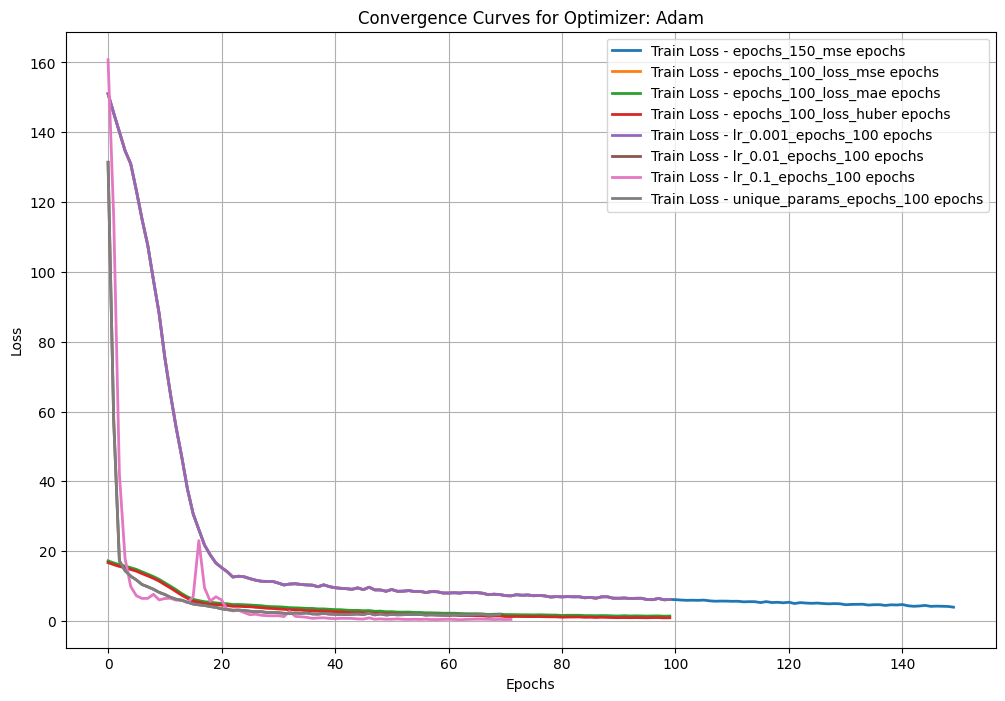

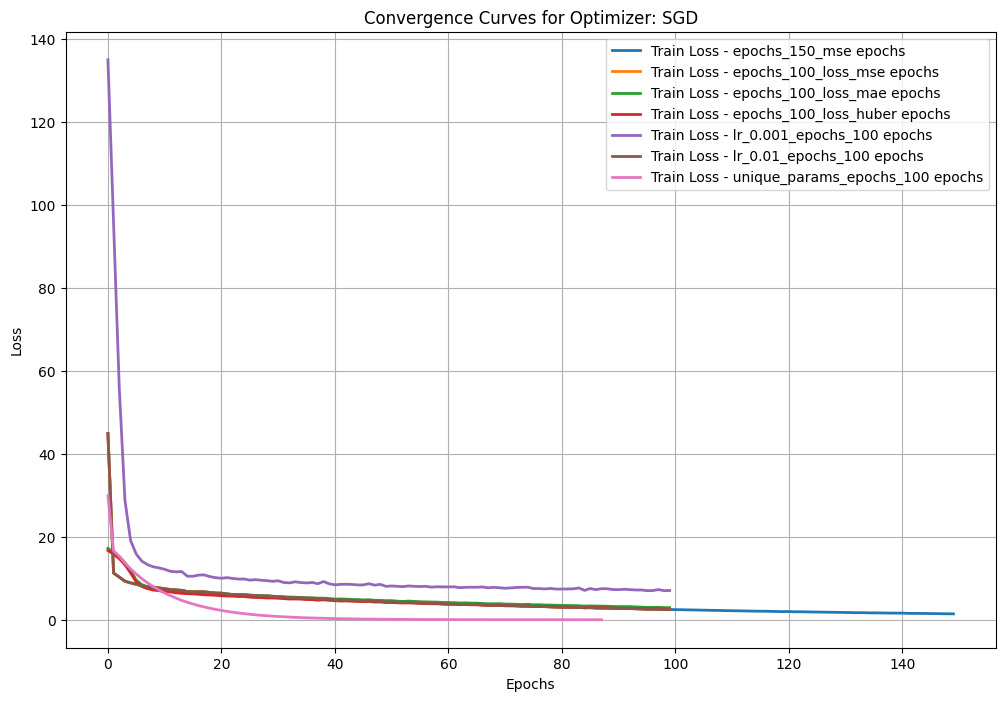

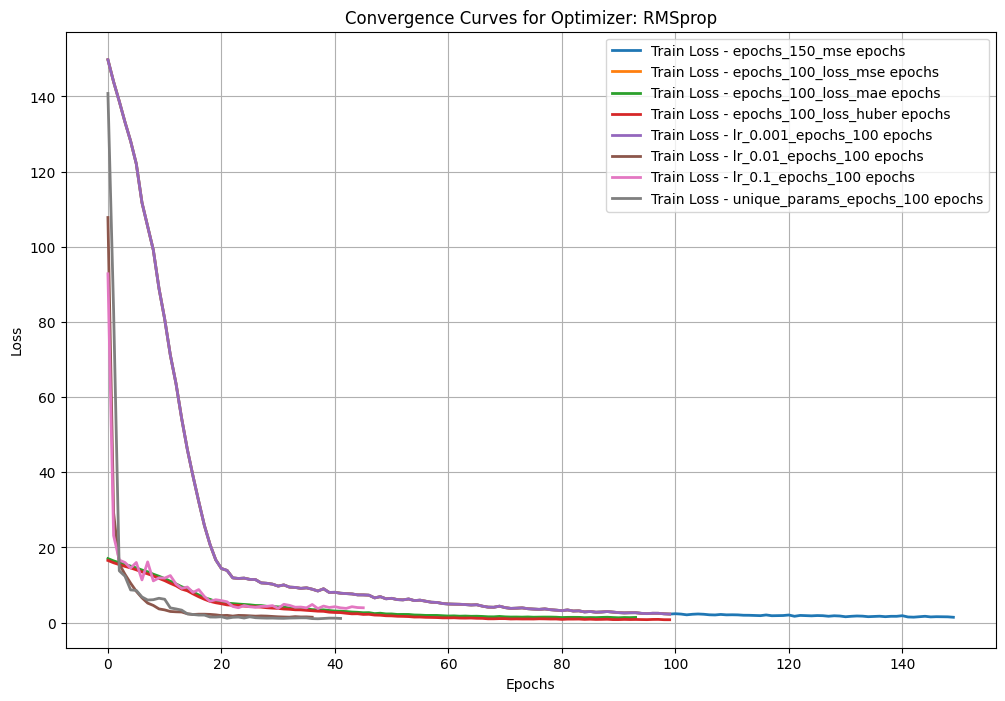

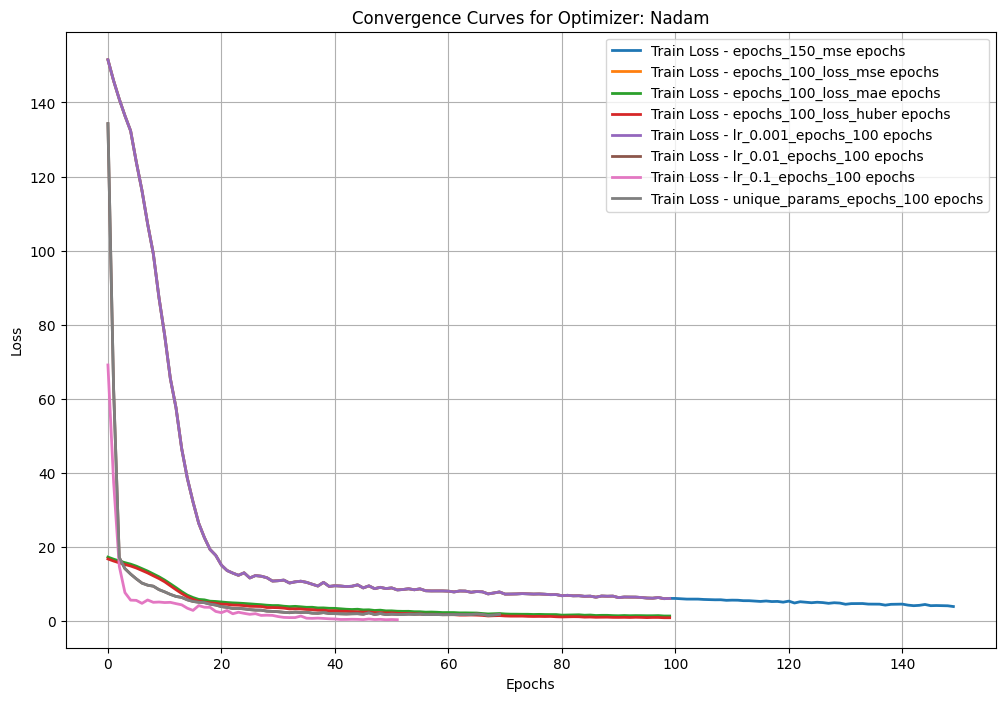

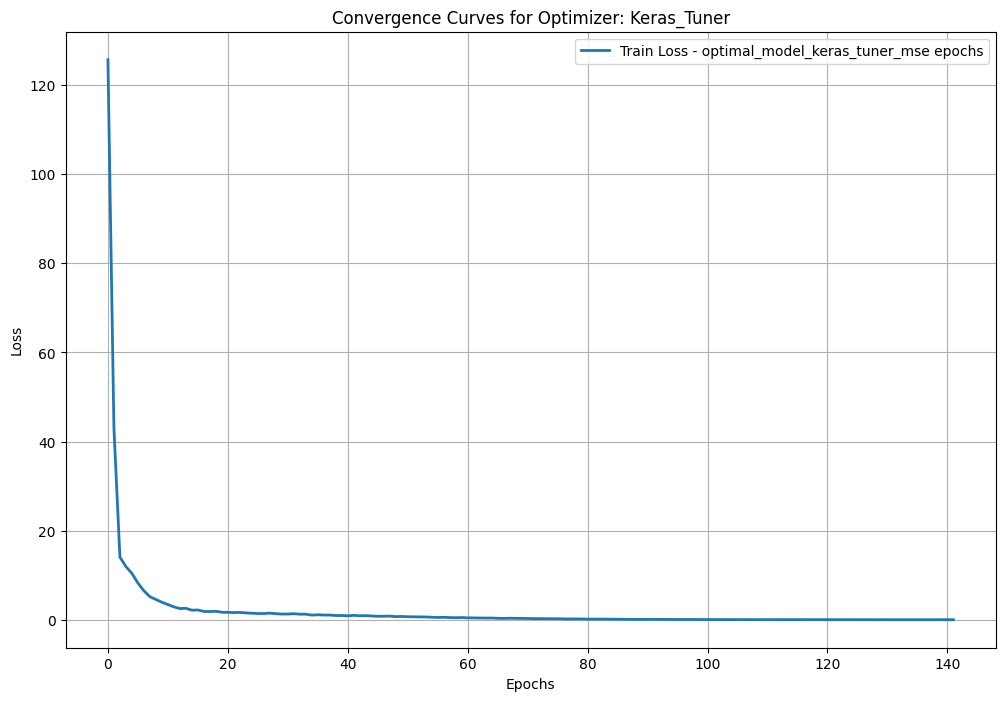

In [47]:
# Plotting convergence curves
for opt in results:
    plt.figure(figsize=(12, 8))
    for epochs in results[opt]:
        history = results[opt][epochs]['history']
        plt.plot(history['loss'], label=f'Train Loss - {epochs} epochs', linewidth=2)
        #plt.plot(history['val_loss'], label=f'Val Loss - {epochs} epochs', linestyle='--', linewidth=2)
    plt.title(f'Convergence Curves for Optimizer: {opt}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

We can see that no matter the number of epochs and the initialized weight, we see that the convergence is not impacted.

# Submission 

In [ ]:
# Construire le modèle final avec les meilleurs hyperparamètres
final_hypermodel = MyHyperModel()
final_model = final_hypermodel.build(best_hps)

# Entraîner le modèle final sur l'ensemble des données d'entraînement
final_model.fit(X_train_scaled, y_train_log, epochs=150, batch_size=32, verbose=1)

# Faire des prédictions sur les données de test
final_predictions_log = final_model.predict(X_test_scaled)

# Convertir les prédictions en échelle originale
final_predictions = np.exp(final_predictions_log.flatten())

# Créer le fichier de soumission
submission = pd.DataFrame({
    'Id': df_test_ids,
    'SalePrice': final_predictions
})

# Sauvegarder le fichier de soumission
submission.to_csv('submission.csv', index=False)
print('Submission file ready!')